# Looking at the angle (zRotation)

In [1]:
%matplotlib inline

import os
from collections import Counter

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bb_binary import FrameContainer, Repository

matplotlib.rc("figure", figsize=(12,6))
sns.set_style("white")

repo = Repository("/Users/alexa/Projects/bees-sna/2015/")

In [3]:
positions = []
tmp_count = 0
frame_count = 0
detection_counts = []
rotation = []

for frame, detection in repo.iter_frames():
    frame_count = frame_count + 1
    for detection in frame.detectionsUnion.detectionsDP:
        tmp_count += 1
        positions.append((detection.xpos, detection.ypos))
        rotation.append(detection.zRotation)
    detection_counts.append(tmp_count)
    tmp_count = 0

## Detections Stats

In [4]:
a = np.array(detection_counts)
average = np.average(a)
print("Average: {}".format(average))
print("Max: {}".format(np.max(a)))
print("Min: {}".format(np.min(a)))
print("Mean: {}".format(np.mean(a)))
print("Median: {}".format(np.median(a)))

Average: 88.2763671875
Max: 98
Min: 78
Mean: 88.2763671875
Median: 88.0


## Rotations Stats

In [5]:
b = np.array(rotation)
print("Max: {}".format(np.max(b)))
print("Min: {}".format(np.min(b)))
positions = np.array(positions)
print("Anzahl der Positionen: {}".format(len(positions)))

Max: 3.141545534133911
Min: -3.1415843963623047
Anzahl der Positionen: 90395


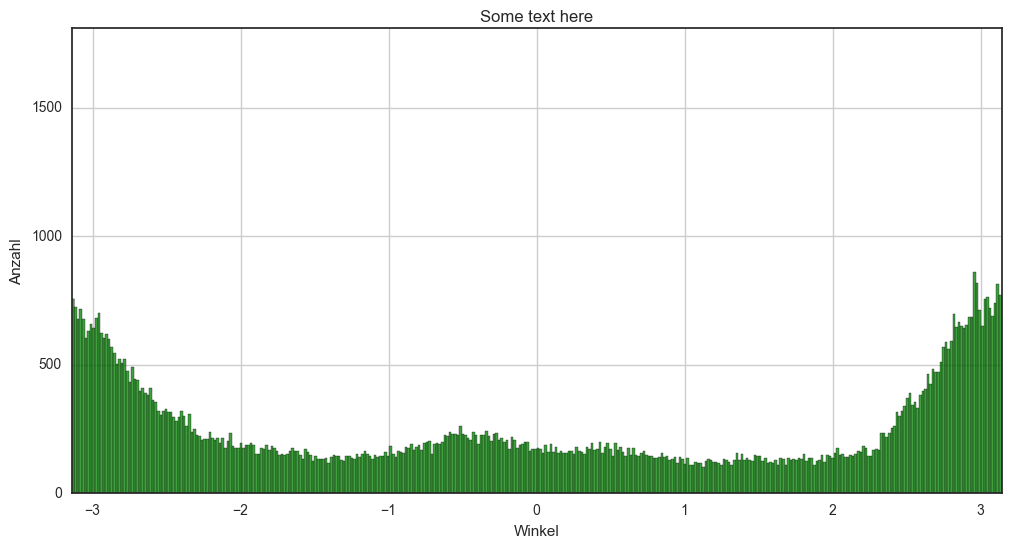

In [8]:
# the histogram of the data
n, bins, patches = plt.hist(rotation, 360, normed=False, facecolor='green', alpha=0.75)

plt.xlabel('Winkel')
plt.ylabel('Anzahl')
plt.title('Some text here')
plt.axis([-np.pi, np.pi, 0, len(positions)/50])
plt.grid(True)

plt.show()

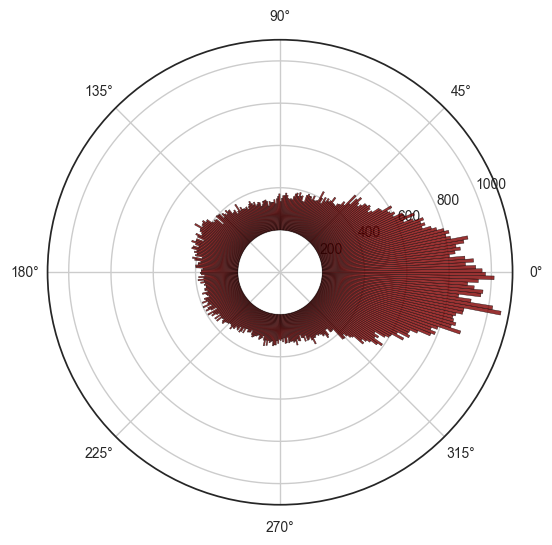

[ 0.          0.01745329  0.03490659  0.05235988  0.06981317  0.08726646
  0.10471976  0.12217305  0.13962634  0.15707963  0.17453293  0.19198622
  0.20943951  0.2268928   0.2443461   0.26179939  0.27925268  0.29670597
  0.31415927  0.33161256  0.34906585  0.36651914  0.38397244  0.40142573
  0.41887902  0.43633231  0.45378561  0.4712389   0.48869219  0.50614548
  0.52359878  0.54105207  0.55850536  0.57595865  0.59341195  0.61086524
  0.62831853  0.64577182  0.66322512  0.68067841  0.6981317   0.71558499
  0.73303829  0.75049158  0.76794487  0.78539816  0.80285146  0.82030475
  0.83775804  0.85521133  0.87266463  0.89011792  0.90757121  0.9250245
  0.9424778   0.95993109  0.97738438  0.99483767  1.01229097  1.02974426
  1.04719755  1.06465084  1.08210414  1.09955743  1.11701072  1.13446401
  1.15191731  1.1693706   1.18682389  1.20427718  1.22173048  1.23918377
  1.25663706  1.27409035  1.29154365  1.30899694  1.32645023  1.34390352
  1.36135682  1.37881011  1.3962634   1.41371669  1.

In [11]:
N = 360
bottom = 200
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = n
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

print(theta)